In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn import datasets, metrics
data = datasets.load_breast_cancer()
print(len(data.data))
print(len(data.target))
print(np.array(data))

569
569
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [18]:
#converting np.array into dataframe 
import pandas as pd
x = pd.DataFrame(data=data.data)
y=data.target
print(x)
print(y)

        0      1       2       3   ...      26      27      28       29
0    17.99  10.38  122.80  1001.0  ...  0.7119  0.2654  0.4601  0.11890
1    20.57  17.77  132.90  1326.0  ...  0.2416  0.1860  0.2750  0.08902
2    19.69  21.25  130.00  1203.0  ...  0.4504  0.2430  0.3613  0.08758
3    11.42  20.38   77.58   386.1  ...  0.6869  0.2575  0.6638  0.17300
4    20.29  14.34  135.10  1297.0  ...  0.4000  0.1625  0.2364  0.07678
..     ...    ...     ...     ...  ...     ...     ...     ...      ...
564  21.56  22.39  142.00  1479.0  ...  0.4107  0.2216  0.2060  0.07115
565  20.13  28.25  131.20  1261.0  ...  0.3215  0.1628  0.2572  0.06637
566  16.60  28.08  108.30   858.1  ...  0.3403  0.1418  0.2218  0.07820
567  20.60  29.33  140.10  1265.0  ...  0.9387  0.2650  0.4087  0.12400
568   7.76  24.54   47.92   181.0  ...  0.0000  0.0000  0.2871  0.07039

[569 rows x 30 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
print(x_train.shape)

(455, 30)


In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64,kernel_size=5, padding='same', activation='relu',input_shape=(x_train.shape[1],1)),
        tf.keras.layers.MaxPooling1D(pool_size=2),
          
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128
                              , activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')        
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 30, 64)            384       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 15, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               123008    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 123,521
Trainable params: 123,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [50]:
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30, 1)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=1)

(455, 30, 1)
(114, 30, 1)
Epoch 1/20
15/15 [==============================] - 0s 10ms/step - loss: 0.2613 - accuracy: 0.8989 - val_loss: 0.1040 - val_accuracy: 0.9561
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0959 - accuracy: 0.9736 - val_loss: 0.0743 - val_accuracy: 0.9737
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0874 - accuracy: 0.9648 - val_loss: 0.0709 - val_accuracy: 0.9649
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.9736 - val_loss: 0.0706 - val_accuracy: 0.9737
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0619 - accuracy: 0.9780 - val_loss: 0.0641 - val_accuracy: 0.9649
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0557 - accuracy: 0.9802 - val_loss: 0.0597 - val_accuracy: 0.9737
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9868 - val_loss: 0.0472 - val_accuracy: 

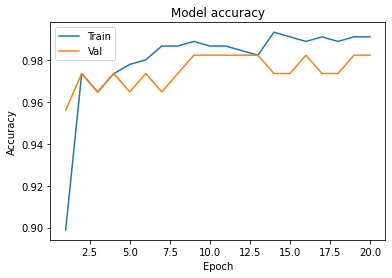

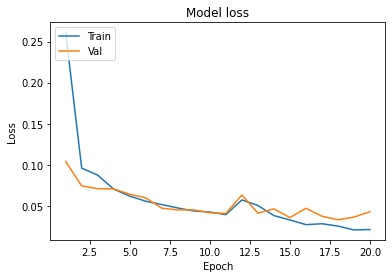

In [53]:
epoch_range = range(1, 21)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')

plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()